In [28]:
import numpy as np

rand = np.random.RandomState(42)
X = rand.rand(10, 2)

print(X)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]


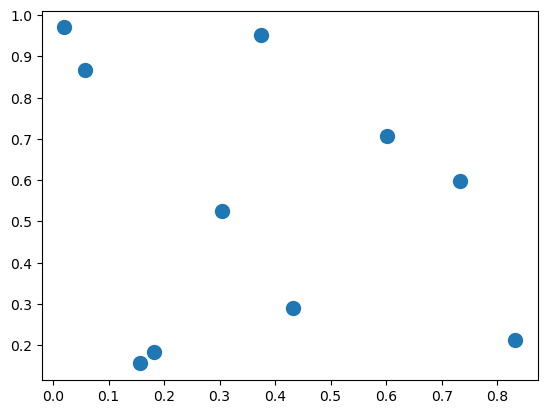

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=100)
plt.show()

In [3]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [4]:
#  for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [8]:
#  square the differences

sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [12]:
dist_sq= sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [17]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
dist_sq

array([[0.        , 0.25171654, 0.67933117, 0.10729142, 0.11021119,
        0.12565305, 0.75487265, 0.62590345, 0.1863819 , 0.43821601],
       [0.25171654, 0.        , 0.52769893, 0.52572083, 0.02910074,
        0.64393098, 0.1593326 , 0.47512176, 0.18843303, 0.18454216],
       [0.67933117, 0.52769893, 0.        , 0.51394921, 0.50290096,
        0.68080058, 0.46072414, 0.00141727, 0.15795558, 0.09442377],
       [0.10729142, 0.52572083, 0.51394921, 0.        , 0.31987984,
        0.01216687, 1.02713477, 0.48148903, 0.17716149, 0.47033641],
       [0.11021119, 0.02910074, 0.50290096, 0.31987984, 0.        ,
        0.40557444, 0.29926414, 0.45108072, 0.12173825, 0.20237694],
       [0.12565305, 0.64393098, 0.68080058, 0.01216687, 0.40557444,
        0.        , 1.23302708, 0.64458914, 0.27862329, 0.62982499],
       [0.75487265, 0.1593326 , 0.46072414, 1.02713477, 0.29926414,
        1.23302708, 0.        , 0.42414057, 0.37660024, 0.16662198],
       [0.62590345, 0.47512176, 0.0014172

In [19]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [39]:
K = 2
nearest_partition = np.argpartition(dist_sq, K+1, axis=1)
nearest_partition

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]])

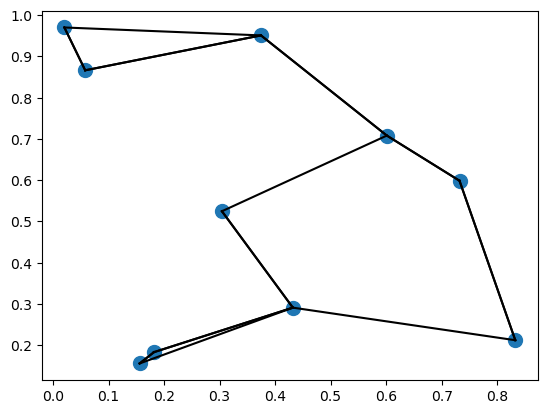

In [43]:
plt.scatter(X[:, 0], X[:, 1], s=100)

#draw lines from each point to its two nearest neighbors

for i in range(nearest_partition.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')